<img src="Alzheimers_Disease_Prediction_fire.png" width="1000" height="1000">

# Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('AD.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


# Data Cleaning

In [3]:
df = df.drop(['Subject ID','MRI ID', 'Visit', 'Hand'], axis=1)

In [4]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)
#df = df.drop_duplicates()

number of duplicate rows:  (0, 11)


# EDA / Visualization

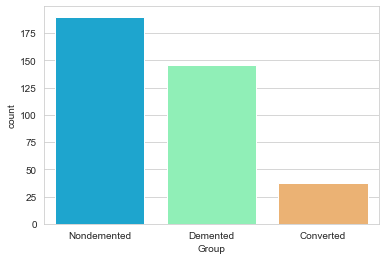

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Group',data=df,palette='rainbow')

In [6]:
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])

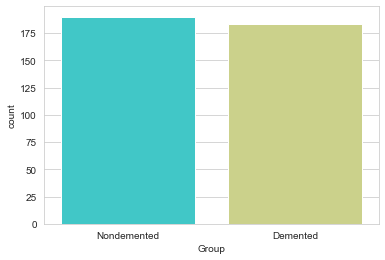

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Group',data=df,palette='rainbow')

In [8]:
for i in range(df['M/F'].size):
    if df['M/F'][i]=='M':
        df['M/F'][i]= 0
    elif df['M/F'][i]=='F':
        df['M/F'][i] = 1 
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0])        

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Group        0
MR Delay     0
M/F          0
Age          0
EDUC         0
SES         19
MMSE         2
CDR          0
eTIV         0
nWBV         0
ASF          0
dtype: int64

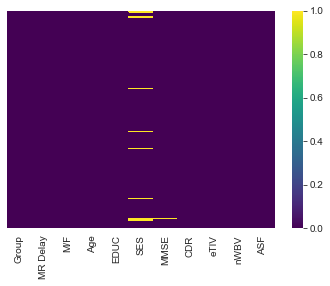

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')
df.isnull().sum()

# Data Pre-processing

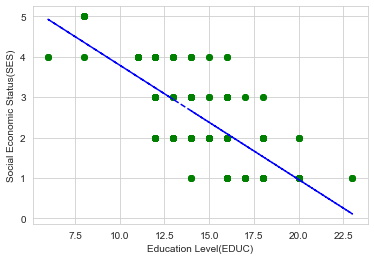

In [10]:
x = df['EDUC']
y = df['SES']

ses_not_null_index = y[~y.isnull()].index
x = x[ses_not_null_index]
y = y[ses_not_null_index]

z = np.polyfit(x, y, 1) #y = mx^1 +c
p = np.poly1d(z) # slope, intercept
plt.plot(x, y, 'go')
plt.plot(x, p(x), "b--")
plt.xlabel('Education Level(EDUC)')
plt.ylabel('Social Economic Status(SES)')

plt.show()

In [11]:
df["SES"].fillna(df.groupby("EDUC")["SES"].transform("median"), inplace=True)

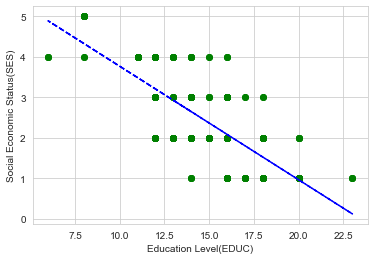

In [12]:
x = df['EDUC']
y = df['SES']

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, y, 'go')
plt.plot(x, p(x), "b--")
plt.xlabel('Education Level(EDUC)')
plt.ylabel('Social Economic Status(SES)')

plt.show()

In [13]:
df=df.dropna(axis=0, how='any') ## Remove MMSE null(NaN) values 

# Feature Selection

In [38]:
df.head()

,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,457,0,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,0,0,75,12,3.0,23.0,0.5,1678,0.736,1.046
3,1,560,0,76,12,3.0,28.0,0.5,1738,0.713,1.010
4,1,1895,0,80,12,3.0,22.0,0.5,1698,0.701,1.034


In [14]:
X=df.iloc[:,1:11]
Y=df.iloc[:,0]

bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,Y)

      Specs       Scores
0  MR Delay  3824.320786
6       CDR   107.733713
5      MMSE    50.556192
1       M/F     8.317937
7      eTIV     8.267758


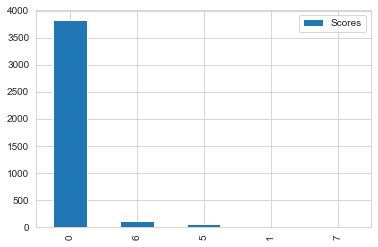

In [15]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Specs','Scores']
print(featureScores.nlargest(5,'Scores'))
featureScores.nlargest(5,'Scores').plot(kind='bar')


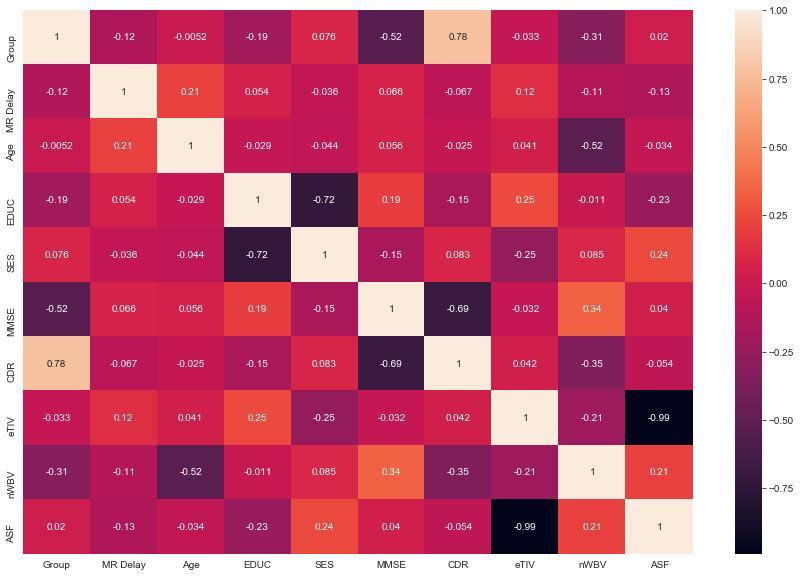

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

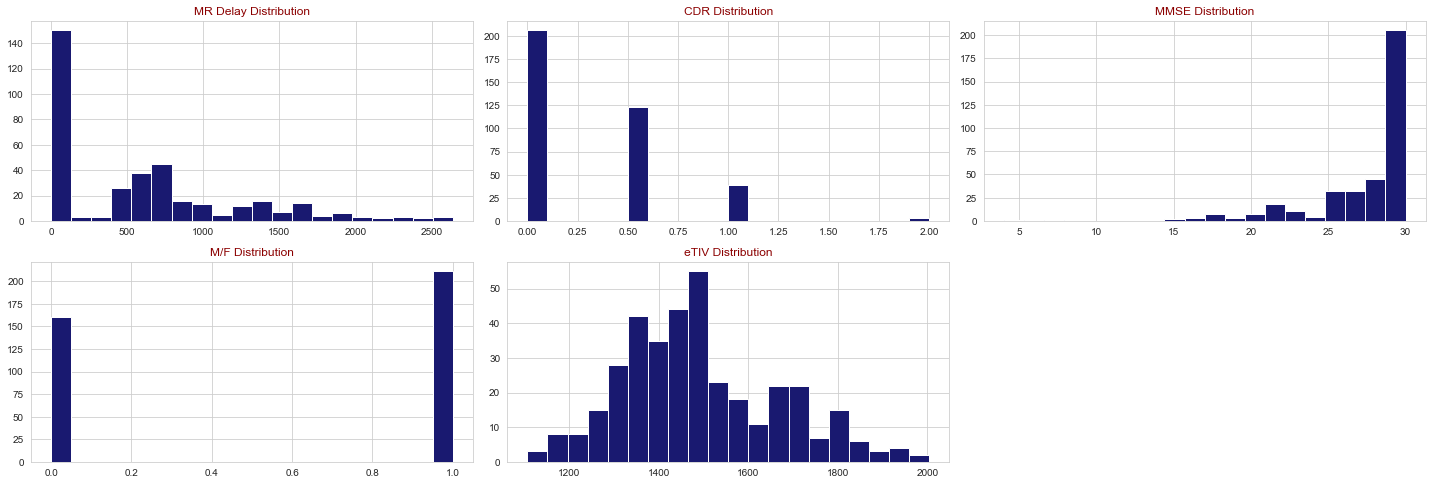

In [17]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')

    fig.tight_layout()
    plt.show()

fss=featureScores.nlargest(5,'Scores')
fssi=fss.reset_index()
fs=fssi.Specs
draw_histograms(df,fs,6,3)

In [18]:
import pprint
def chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]
def Ex(dataframe, features):
    for i, feature in enumerate(features):
        c = df[feature]
        x =list(c)
        x = list( dict.fromkeys(x))
        print(x)
        print("-----------------------------------------------------------------------------")
        if len(x)>6:
            pprint.pprint(list(chunks(x, 12)))
            print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
Ex(df,fs)

[0, 457, 560, 1895, 538, 1010, 1603, 518, 1281, 742, 576, 854, 730, 1598, 643, 1456, 504, 707, 617, 1861, 2400, 489, 1933, 756, 1563, 1164, 828, 578, 673, 609, 1234, 1779, 610, 1099, 932, 446, 1588, 642, 1287, 1884, 405, 713, 1770, 2369, 1123, 2029, 2508, 486, 567, 1204, 1331, 1008, 491, 352, 866, 689, 575, 248, 647, 970, 1233, 395, 687, 1526, 1510, 842, 846, 726, 622, 640, 1340, 212, 764, 1290, 873, 1651, 723, 1351, 490, 830, 1282, 497, 451, 1438, 2163, 743, 432, 672, 1415, 1870, 2386, 365, 580, 1705, 2288, 2517, 956, 1663, 1393, 441, 1019, 584, 1435, 1209, 659, 670, 802, 754, 751, 563, 680, 1345, 1047, 706, 817, 1412, 778, 1024, 661, 807, 1218, 1752, 952, 1631, 1387, 1554, 2002, 465, 675, 729, 883, 766, 881, 558, 570, 616, 1927, 1422, 733, 1713, 595, 597, 472, 1192, 851, 1042, 2153, 2639, 1140, 737, 1591, 679, 1006, 539, 1146, 636, 403, 793, 1655, 1022, 665, 561, 1553, 683, 1707, 525, 440, 1806, 674, 790, 1329, 791, 777, 1399, 759, 552, 454, 1033, 621, 736, 691, 493, 1695, 1212, 695,

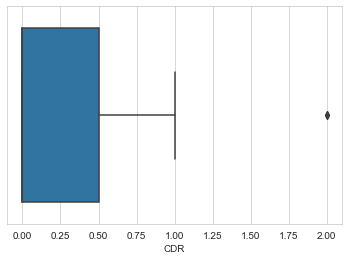

In [19]:
sns.boxplot(x=df['CDR'])

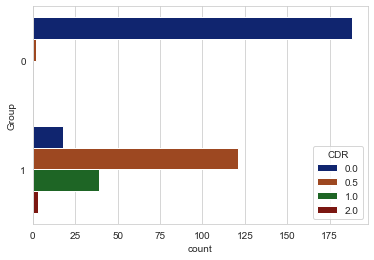

In [20]:
sns.set_style('whitegrid')
sns.countplot(y='Group',hue='CDR',data=df,palette="dark")

# Test_Train Split

In [21]:
X=df[fs].values
Y=df['Group'].values

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

# Feature scaling

Standardization: It is a very effective technique which re-scales a feature value so that it has distribution with 0 mean value and variance equals to 1

In [23]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
classifier =LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_pred=classifier.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.956989247311828

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.95      0.95        44
           1       0.96      0.96      0.96        49

    accuracy                           0.96        93
   macro avg       0.96      0.96      0.96        93
weighted avg       0.96      0.96      0.96        93



# SVM

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

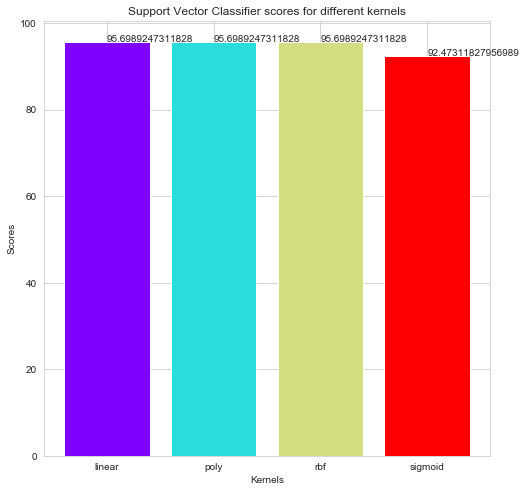

In [28]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

from sklearn.svm import SVC
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, Y_train)
    svc_scores.append(svc_classifier.score(X_test, Y_test)*100)
from matplotlib.cm import rainbow    
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.figure(figsize=(8,8)) 
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
    
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')


In [29]:
classifier2 = SVC(kernel = 'rbf', random_state = 0 ,probability=True)
classifier2.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [30]:
y_pred2 = classifier2.predict(X_test)


In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred2)*100

95.6989247311828

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred2)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        44
           1       0.96      0.96      0.96        49

    accuracy                           0.96        93
   macro avg       0.96      0.96      0.96        93
weighted avg       0.96      0.96      0.96        93




# ROC Curves

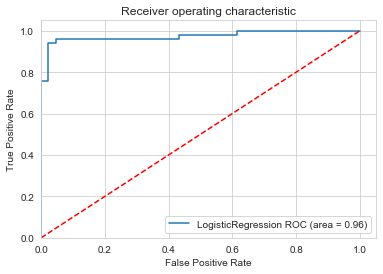

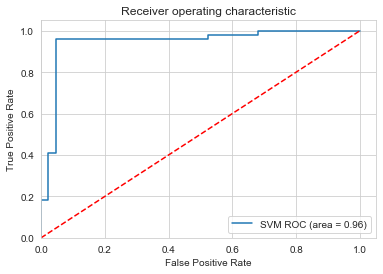

In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
models = [{'model': classifier,'label':'LogisticRegression'},{'model': classifier2,'label':'SVM'}]
for m in models:
    model = m['model']
    model.fit(X_train,Y_train)
    roc_auc = roc_auc_score(Y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('svm_ROC')
    plt.show()
    